### Plots of all years

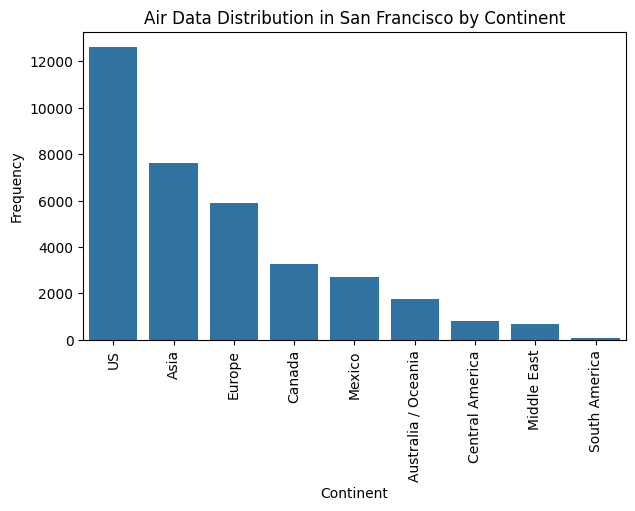

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

continent_counts = data['GEO Region'].value_counts()

# Convert the series to a DataFrame and reset the index
continent_counts_df = pd.DataFrame(continent_counts).reset_index()

# Rename the columns for better readability
continent_counts_df.columns = ['Continent', 'Frequency']

plt.figure(figsize=(7, 4))
sns.barplot(x='Continent', y='Frequency', data=continent_counts_df)
plt.title('Air Data Distribution in San Francisco by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

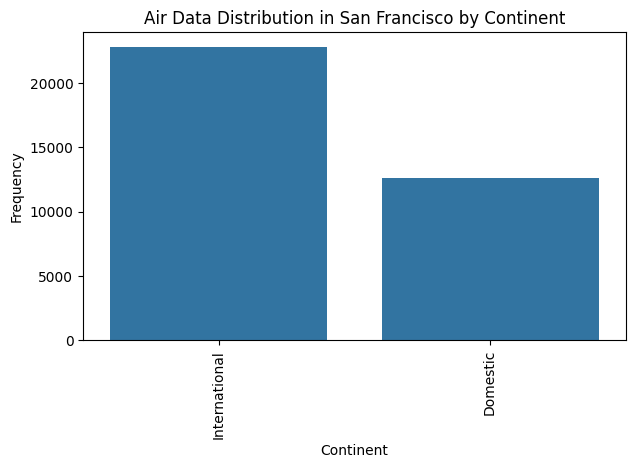

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

continent_counts = data['GEO Summary'].value_counts()

# Convert the series to a DataFrame and reset the index
continent_counts_df = pd.DataFrame(continent_counts).reset_index()

# Rename the columns for better readability
continent_counts_df.columns = ['Continent', 'Frequency']

plt.figure(figsize=(7, 4))
sns.barplot(x='Continent', y='Frequency', data=continent_counts_df)
plt.title('Air Data Distribution in San Francisco by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [2]:
print(continent_counts)

             Continent  Frequency
0                   US      12643
1                 Asia       7641
2               Europe       5881
3               Canada       3275
4               Mexico       2689
5  Australia / Oceania       1760
6      Central America        831
7          Middle East        685
8        South America         91


In [11]:
import plotly.graph_objs as go
import pandas as pd

# Sample data
data = {
    'Continent': ['US', 'Asia', 'Europe', 'Canada', 'Mexico', 'Australia / Oceania', 'Central America', 'Middle East', 'South America'],
    'Frequency': [12643, 7641, 5881, 3275, 2689, 1760, 831, 685, 91]
}

df = pd.DataFrame(data)

# Create interactive bar chart
fig = go.Figure(data=[go.Bar(
    x=df['Continent'],
    y=df['Frequency'],
    marker=dict(color='rgb(26, 118, 255)')
)])

fig.update_layout(
    title='Frequency of Regions',
    xaxis=dict(title='Continent'),
    yaxis=dict(title='Frequency'),
    hovermode='closest',
)

fig.show()


In [16]:
import pandas as pd

# Sample data
data = {
    'Continent': ['US', 'Asia', 'Europe', 'Canada', 'Mexico', 'Australia / Oceania', 'Central America', 'Middle East', 'South America'],
    'Frequency': [12643, 7641, 5881, 3275, 2689, 1760, 831, 685, 91]
}

df = pd.DataFrame(data)

# Create a mapping dictionary for continents
continent_mapping = {
    'US': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Central America': 'North America',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'Australia / Oceania': 'Oceania',
    'Middle East': 'Asia',
    'South America': 'South America'
}

# Map the 'Continent' column to the new continent names
df['Continent'] = df['Continent'].map(continent_mapping)

# Group by the new 'Continent' column and sum the 'Frequency' column
continent_df = df.groupby('Continent')['Frequency'].sum().reset_index()

print(continent_df)


       Continent  Frequency
0           Asia       8326
1         Europe       5881
2  North America      19438
3        Oceania       1760
4  South America         91


In [34]:
import pandas as pd
import plotly.graph_objects as go
import pycountry_convert as pc
import pycountry

# Define the continent frequencies
continent_freq = {
    'AS': 8326,
    'EU': 5881,
    'NA': 19438,
    'OC': 1760,
    'SA': 91,
    'AF': 0,  # Add frequencies for Africa
    'AN': 0   # Antarctica
}

# Create a DataFrame with all country codes
countries = [country.alpha_3 for country in pycountry.countries]
continent_list = []
for code in countries:
    try:
        alpha_2 = pc.country_alpha3_to_country_alpha2(code)
        continent_code = pc.country_alpha2_to_continent_code(alpha_2)
        continent_list.append(continent_code)
    except:
        continent_list.append('AN')

country_df = pd.DataFrame({
    'Country': countries,
    'Continent': continent_list
})

# Map each country to its continent's frequency
country_df['Frequency'] = country_df['Continent'].map(continent_freq)

# Create the interactive world map
fig = go.Figure(data=go.Choropleth(
    locations=country_df['Country'],  # use the country codes for the locations
    z=country_df['Frequency'],  # use the frequency for the color scale
    text=country_df['Continent'],  # use the continent codes for the hover text
    locationmode='ISO-3',  # indicate that we're using ISO 3166-1 alpha-3 codes
    colorscale='Viridis',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Frequency',
))

fig.update_layout(
    title_text='Frequency by Continent from 1999 until 2024',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()


### Plots through the years

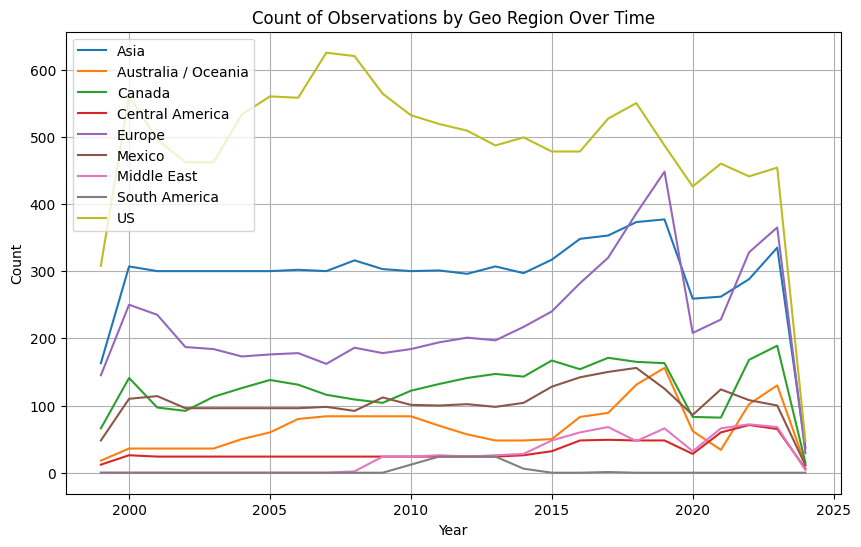

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Convert 'Activity Period Start Date' to datetime if it's not already
data['Activity Period Start Date'] = pd.to_datetime(data['Activity Period Start Date'])

# Extract year from 'Activity Period Start Date'
data['Year'] = data['Activity Period Start Date'].dt.year

# Aggregate data by year and geo region
region_counts = data.groupby(['Year', 'GEO Region']).size().unstack(fill_value=0)

# Plot time series for each geo region
plt.figure(figsize=(10, 6))
for region in region_counts.columns:
    plt.plot(region_counts.index, region_counts[region], label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Observations by Geo Region Over Time')
plt.legend()
plt.grid(True)
plt.show()


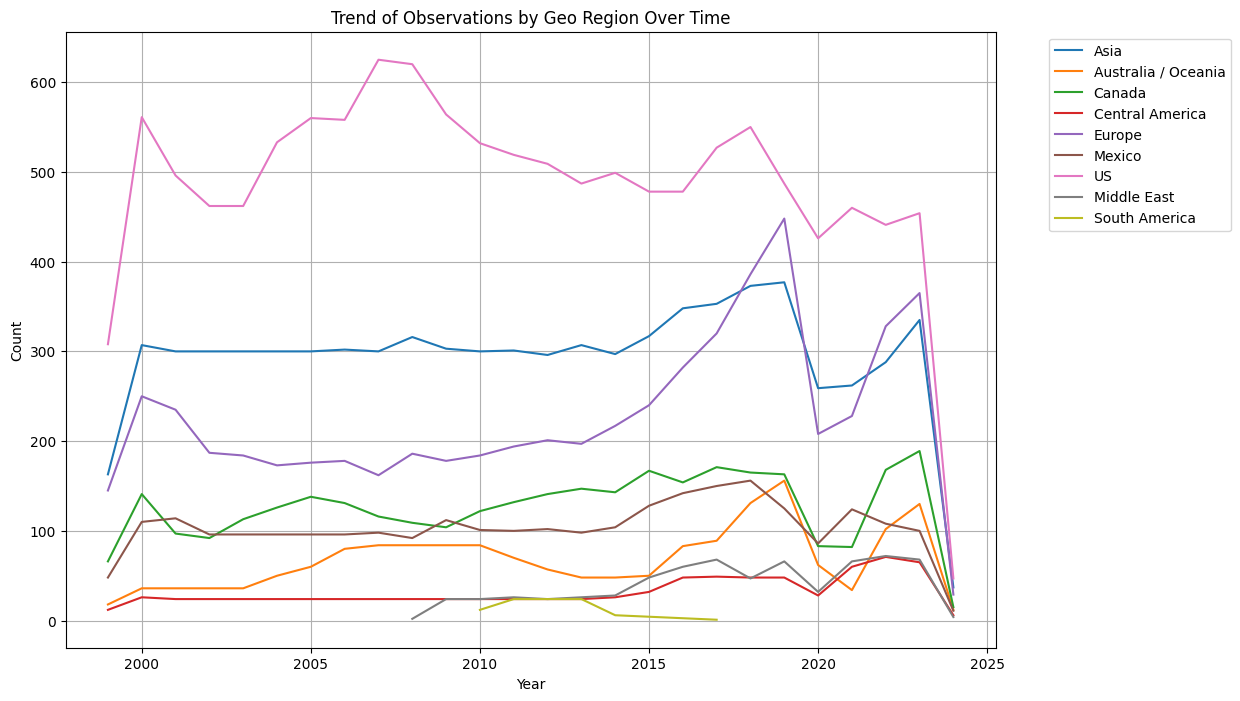

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Convert 'Activity Period Start Date' to datetime if it's not already
data['Activity Period Start Date'] = pd.to_datetime(data['Activity Period Start Date'])

# Extract year from 'Activity Period Start Date'
data['Year'] = data['Activity Period Start Date'].dt.year

# Group data by year and geo region
grouped_data = data.groupby(['Year', 'GEO Region']).size().reset_index(name='Count')

# Plot line chart for each geo region
plt.figure(figsize=(12, 8))
for region in grouped_data['GEO Region'].unique():
    region_data = grouped_data[grouped_data['GEO Region'] == region]
    plt.plot(region_data['Year'], region_data['Count'], label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend of Observations by Geo Region Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


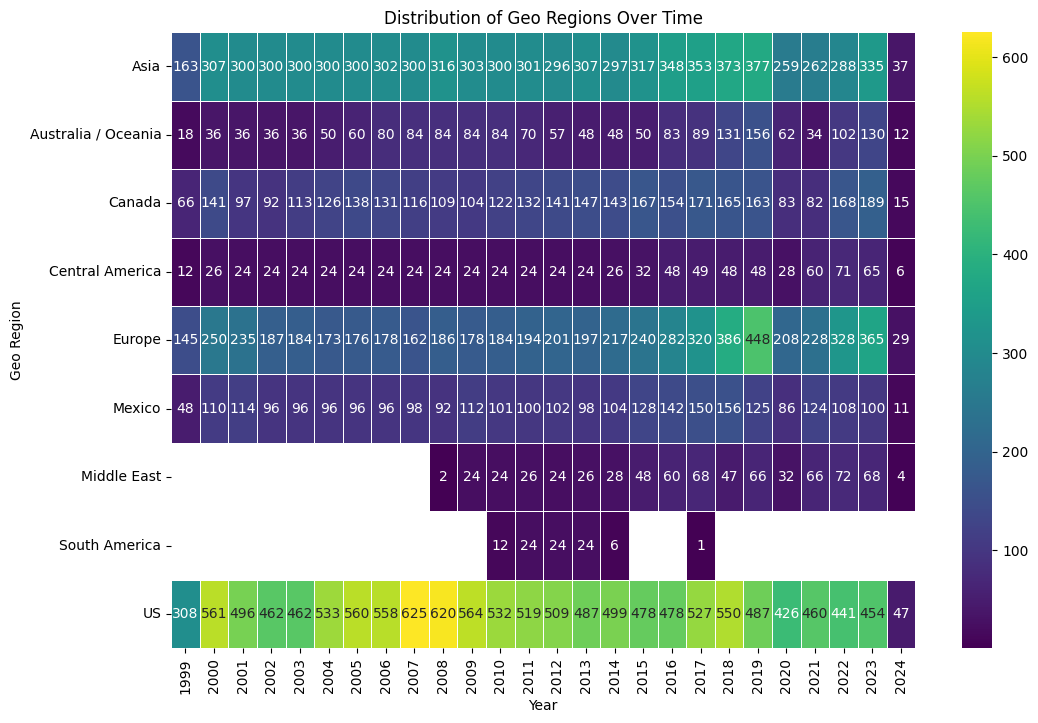

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Convert 'Activity Period Start Date' to datetime if it's not already
data['Activity Period Start Date'] = pd.to_datetime(data['Activity Period Start Date'])

# Extract year from 'Activity Period Start Date'
data['Year'] = data['Activity Period Start Date'].dt.year

# Group data by year and geo region
grouped_data = data.groupby(['Year', 'GEO Region']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the heatmap
heatmap_data = grouped_data.pivot(index='GEO Region', columns='Year', values='Count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Distribution of Geo Regions Over Time')
plt.xlabel('Year')
plt.ylabel('Geo Region')
plt.show()


In [1]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category10_10
from bokeh.models import Legend

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Convert 'Activity Period Start Date' to datetime if it's not already
data['Activity Period Start Date'] = pd.to_datetime(data['Activity Period Start Date'])

# Extract year from 'Activity Period Start Date'
data['Year'] = data['Activity Period Start Date'].dt.year

# Group data by year and geo region
grouped_data = data.groupby(['Year', 'GEO Region']).size().reset_index(name='Count')

# Create a Bokeh plot
output_notebook()
p = figure(title="Trend of Observations by Geo Region Over Time", x_axis_label='Year', y_axis_label='Count', width=1000, height=600)

# Assign a color to each geo region
colors = Category10_10

# Plot line for each geo region
renderers = []
for i, region in enumerate(grouped_data['GEO Region'].unique()):
    region_data = grouped_data[grouped_data['GEO Region'] == region]
    renderer = p.line(region_data['Year'], region_data['Count'], line_color=colors[i % 10], line_width=2)
    renderers.append(renderer)

# Add legend with clickable toggles
legend_items = []
for region, renderer in zip(grouped_data['GEO Region'].unique(), renderers):
    legend_items.append((region, [renderer]))

legend = Legend(items=legend_items, location='center')

# Set the legend location to be outside the plot
p.add_layout(legend, 'right')

p.legend.click_policy = "mute"

# Show the plot
show(p)


C:\Users\nerea\AppData\Local\Temp\ipykernel_12440\442952063.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loading BokehJS ...

In [5]:
import pandas as pd

# Set the pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(grouped_data)

     Year           GEO Region  Count
0    1999                 Asia    163
1    1999  Australia / Oceania     18
2    1999               Canada     66
3    1999      Central America     12
4    1999               Europe    145
5    1999               Mexico     48
6    1999                   US    308
7    2000                 Asia    307
8    2000  Australia / Oceania     36
9    2000               Canada    141
10   2000      Central America     26
11   2000               Europe    250
12   2000               Mexico    110
13   2000                   US    561
14   2001                 Asia    300
15   2001  Australia / Oceania     36
16   2001               Canada     97
17   2001      Central America     24
18   2001               Europe    235
19   2001               Mexico    114
20   2001                   US    496
21   2002                 Asia    300
22   2002  Australia / Oceania     36
23   2002               Canada     92
24   2002      Central America     24
25   2002   

In 1999 we have low activity because the dataset starts in 07/1999.
In 2024 we have low activity because the dataset ends in 01/2024

After 2001 some countries have a significant decrease due to 11S (probably)